### Logistic Regression Model

Want $ 0 \le h_\theta(x) \le 1 $

$h_\theta(x) = g(\theta^{T}x)$

**Sigmoid function/Logistic function**: $g(z) = \frac{1}{1+e^{-z}}$

**Hypothesis**: $h_\theta(x) = \frac{1}{1+e^{-\Theta^{T}x}}$

**Cost function**: $J(\theta) = \frac{1}{m}\sum_{i=1}^{m}Cost(h_\theta(x^{(i)}), y^{(i)}) $


$Cost(h_\theta(x),y) = $ <br>
$-log(h_\theta(x)) $&nbsp;&nbsp;&nbsp;if y = 1 <br>
$-log(1 - h_\theta(x))$&nbsp;&nbsp;&nbsp; if y = 0

$J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log (1-h_\theta(x^{(i)}))]$

**Gradient descent**: <br>
Repeat { <br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$<br>
}

### Regularization
**Cost function**: $J(\theta) = -\frac{1}{m}[\sum_{i=1}^{m}y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log (1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^{2}$

**Gradient descent**: <br>
Repeat { <br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_0^{(i)}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$\theta_j := \theta_j - [\alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} - \frac{\lambda}{m}\theta_j]$<br>
}


In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

X.shape (200, 2)
y.shape (200,)


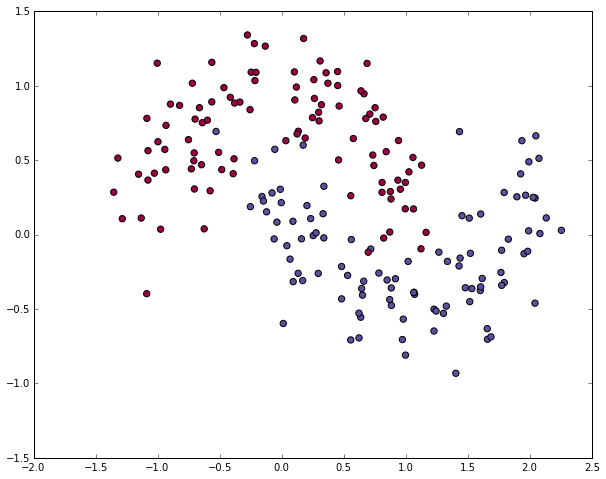

In [2]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
print 'X.shape', X.shape
print 'y.shape', y.shape
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
y = y.reshape(y.size, 1)


In [124]:
# Helper function to plot a decision boundary.
# If you don't fully understand thi function don't worry, it just generate contour plot below
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])s
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

    
# @param X: m by n matrix
# @param theta: n by o matrix
# @return: m by o matrix
def predict(X, theta):
    h = - np.dot(X, theta)
    return 1.0 / (1 + np.exp(h))

def compute_cost(X, y, theta, reg_lambda):
    m = X.size
    h = predict(X, theta)
    s1 = np.dot(y.T, np.log(h))
    s2 = np.dot((1-y).T, (np.log(1 - h)))
    cost = s2.sum()
    reg = (reg_lambda / (2 * m)) * np.power(theta, 2).sum()
    return -(1.0/(2*m) * cost) + reg

def compute_gradient(X, y, theta, reg_lambda):
    m = X.size
    h = predict(X, theta)
    cost = (h - y)
    cost = np.dot(X.T, cost)
    cost = (1.0/m) * cost
    reg = ((reg_lambda / m) * theta)
    return cost + reg

def predict_binary(X, theta):
    predicted = predict(X, theta)
    ones_ = predicted >= 0.5
    zeros_ = predicted < 0.5
    predicted[ones_] = 1
    predicted[zeros_] = 0
    return predicted

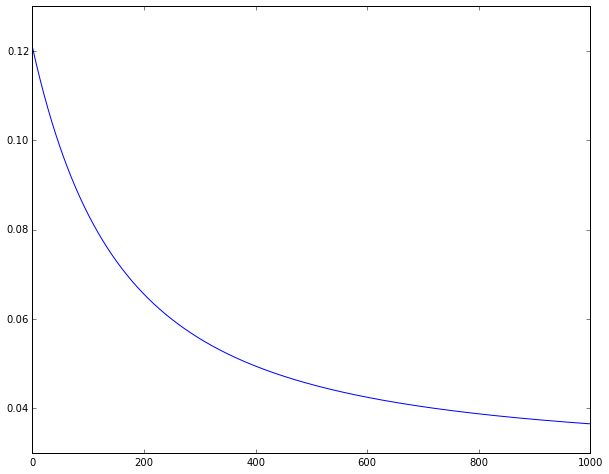

In [125]:
np.random.seed(0)
theta = np.random.rand(2, 1)
reg_lambda = 0.001
alpha = 0.1
costs = []
for i in range(1000):
    cost = compute_cost(X, y, theta, reg_lambda)
    gradient = compute_gradient(X, y, theta, reg_lambda)
    theta = theta - (alpha * gradient)
    costs.append(cost)

plt.plot(costs)

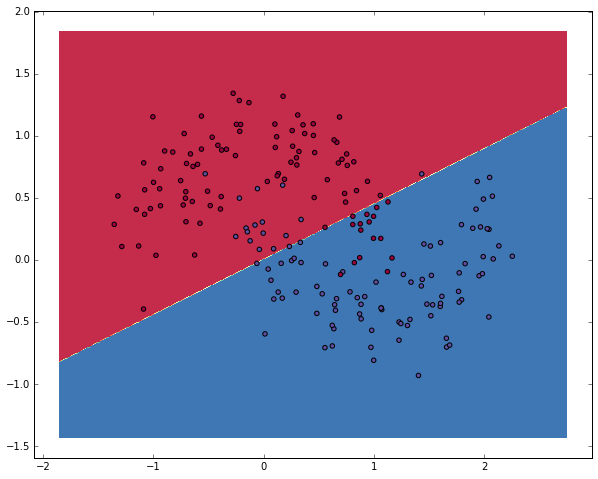

In [126]:
plot_decision_boundary(lambda x: predict_binary(x, theta))

In [250]:
# Forward propagation
def forward_propagation_probs(X, W1, b1, W2, b2):
    m = X.shape[0]
    z1 = np.dot(X, W1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, W2) + b2
    # Softmax
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs, a1

# Backprop
def backward_propagation(probs, a1, W1, b1, W2, b2, reg_lambda, alpha):
    m = probs.shape[0]
    
    delta3 = probs
    delta3[range(m), y.ravel()] -= 1
    dW2 = np.dot(a1.T, delta3)
    db2 = np.sum(delta3, axis=0, keepdims=True)
    
#     print 'db2', db2
    
    delta2 = np.dot(delta3, W2.T) * (1 - np.power(a1, 2))
    dW1 = np.dot(X.T, delta2)
    db1 = np.sum(delta2, axis=0)
    
#     print 'db1', db1
    
    # Add regularization terms (b1 and b2 dont have regularization terms)
    dW2 += reg_lambda * W2
    dW1 += reg_lambda * W1

    # Gradietn descent parameter update
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    
    return W1, b1, W2, b2
    

# Neural network predict
def predict(X, W1, b1, W2, b2):
    m = X.shape[0]
    probs, _ = forward_propagation_probs(X, W1, b1, W2, b2)
    return np.argmax(probs, axis=1).reshape(m, 1)

# 
def compute_loss(X, W1, b1, W2, b2, reg_lambda):
    m = X.shape[0]
    probs, _ = forward_propagation_probs(X, W1, b1, W2, b2)
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(m), y.ravel()])
    data_loss = np.sum(correct_logprobs)
#     print data_loss
    reg = (reg_lambda/2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./m * (data_loss + reg)
    

Loss after iteration 0: 0.694690
Loss after iteration 30: 0.233899
Loss after iteration 60: 0.268304
Loss after iteration 90: 0.126118
Loss after iteration 120: 0.113978
Loss after iteration 150: 0.101885
Loss after iteration 180: 0.095236
Loss after iteration 210: 0.092541
Loss after iteration 240: 0.087681
Loss after iteration 270: 0.084744
Loss after iteration 300: 0.082654
Loss after iteration 330: 0.096328
Loss after iteration 360: 0.083016
Loss after iteration 390: 0.081447
Loss after iteration 420: 0.079596
Loss after iteration 450: 0.078319
Loss after iteration 480: 0.077400
Loss after iteration 510: 0.076759
Loss after iteration 540: 0.076325
Loss after iteration 570: 0.076023
Loss after iteration 600: 0.075784
Loss after iteration 630: 0.075557
Loss after iteration 660: 0.075316
Loss after iteration 690: 0.075060
Loss after iteration 720: 0.074795
Loss after iteration 750: 0.074527
Loss after iteration 780: 0.074263
Loss after iteration 810: 0.074003
Loss after iteration 840:

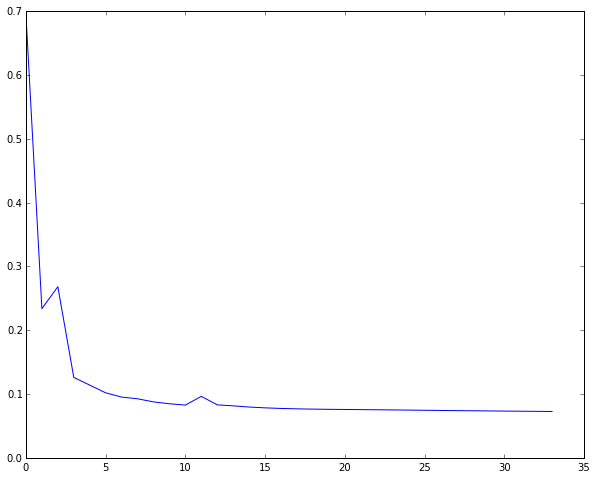

In [263]:
m = X.size
nn_input_dim = 2
nn_hdim = 10
nn_output_dim = 2

reg_lambda = 0.01
alpha = 0.01

np.random.seed(1)
W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
b1 = np.zeros((1, nn_hdim))
W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
b2 = np.zeros((1, nn_output_dim))

costs = []
for i in range(1000):
    probs, a1 = forward_propagation_probs(X, W1, b1, W2, b2)
    if i % 30 == 0:
        cost = compute_loss(X, W1, b1, W2, b2, reg_lambda)
        print 'Loss after iteration %i: %f' %(i, cost)
        costs.append(cost)
    W1, b1, W2, b2 = backward_propagation(probs, a1, W1, b1, W2, b2, reg_lambda, alpha)
    
plt.plot(costs)

print (predict(X, W1, b1, W2, b2) == y).sum()


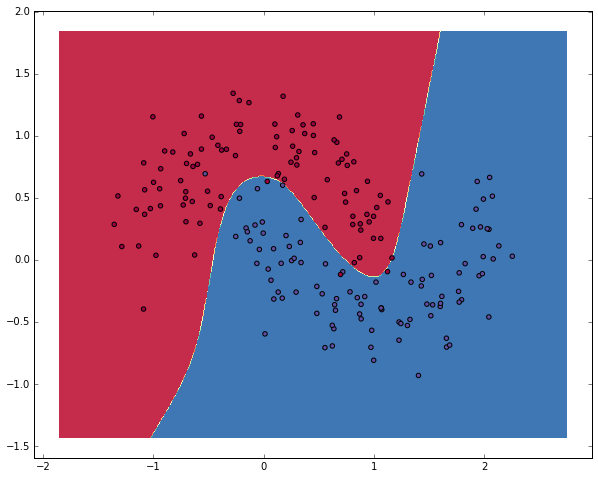

In [264]:
plot_decision_boundary(lambda x: predict(x, W1, b1, W2, b2))